In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [19]:
datafiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-03_1*.txt')

In [20]:
datafiles.sort()

In [21]:
datafiles

['../../radiometer/ReadoutApp/Data/2017-11-03_14:12:27box00.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:16:26box01.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:17:55sky00.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:20:32sky10.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:21:46sky20.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:23:37sky30.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:25:07sky40.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:26:30sky50.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:28:04sky60.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:30:16sky_return50.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:31:39sky_return40.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:33:15sky_return30.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:35:11sky_return20.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:36:53sky_return10.txt',
 '../../radiometer/ReadoutApp/Data/2017-1

In [7]:
x = np.loadtxt('../../radiometer/ReadoutApp/Data/2017-11-03_14:52:06long_sky_00.txt')

In [9]:
times = x[:, 0]
radiodata = x[:, 1]
temperature = x[:, 2]

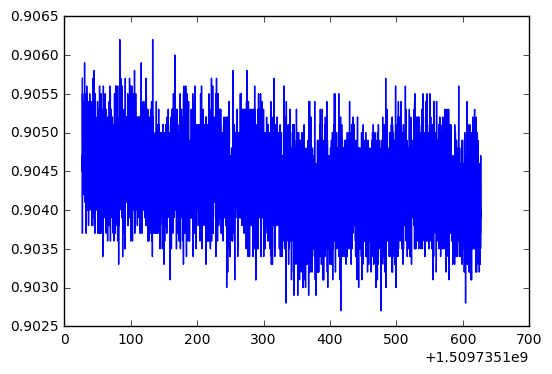

In [10]:
plot(times, radiodata)

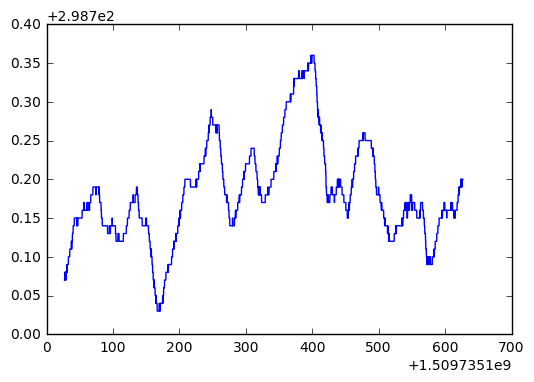

In [11]:
plot(times, temperature)

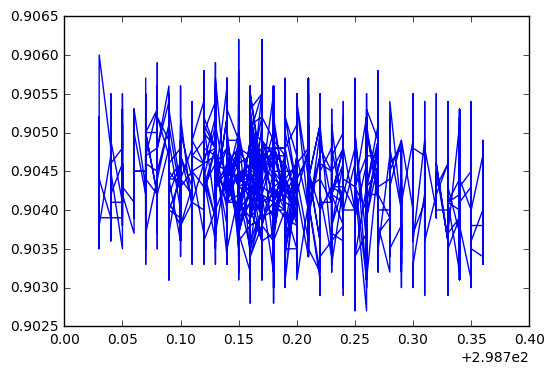

In [12]:
plot(temperature, radiodata)

In [13]:
x = np.loadtxt( '../../radiometer/ReadoutApp/Data/2017-11-03_15:07:24sky_manual_dip.txt')

In [14]:
times = x[:, 0]
radiodata = x[:, 1]
temperature = x[:, 2]

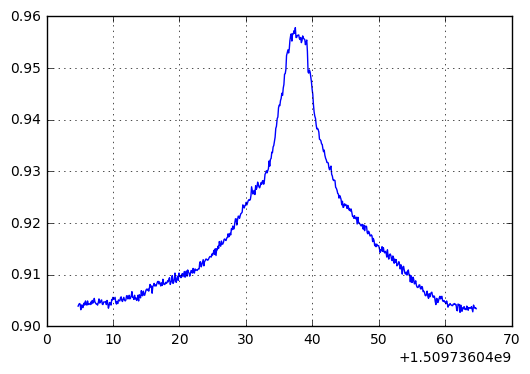

In [16]:
plot(times, radiodata)
grid()

In [108]:
datafiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-03_1*quick*.txt')

In [109]:
datafiles

['../../radiometer/ReadoutApp/Data/2017-11-03_15:02:52sky_quick_00.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:03:04sky_quick_00.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:03:27sky_quick_15.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:03:56sky_quick_30.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:04:23sky_quick_45.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:04:53sky_quick_return_45.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:05:17sky_quick_return_30.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:05:37sky_quick_return_15.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:06:01sky_quick_return_00.txt']

In [110]:
datafiles[0].split('sky_')

['../../radiometer/ReadoutApp/Data/2017-11-03_15:02:52', 'quick_00.txt']

In [111]:
x = {}
for dfile in datafiles:
    x[dfile.split('sky_')[-1]] = np.loadtxt(dfile)

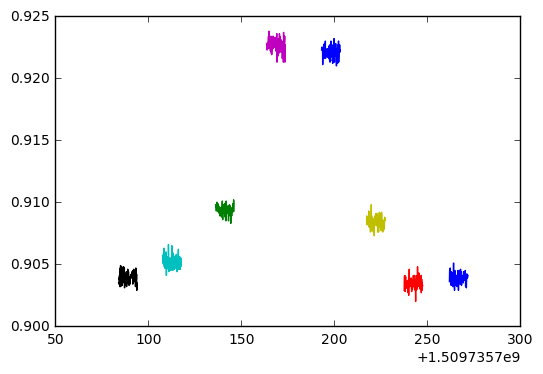

In [112]:
for key in x.keys():
    plot(x[key][:, 0], x[key][:, 1])

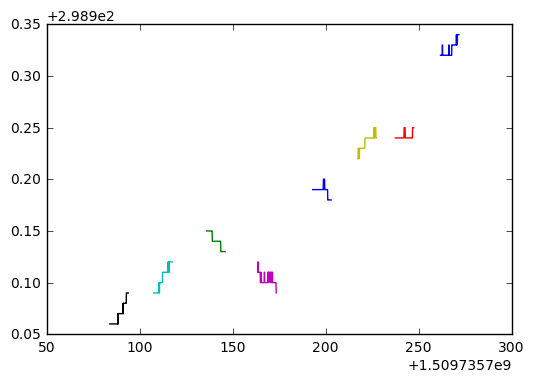

In [113]:
for key in x.keys():
    plot(x[key][:, 0], x[key][:, 2])

In [39]:
key.split('_')[-1].split('.')[0]

'00'

In [49]:
x.keys()

['quick_return_45.txt',
 'quick_30.txt',
 'quick_return_15.txt',
 'quick_15.txt',
 'quick_45.txt',
 'quick_return_30.txt',
 'quick_00.txt',
 'quick_return_00.txt']

In [75]:
radiomean = []
angles = []
for key in x.keys():
    angles.append(float(key.split('_')[-1].split('.')[0]))
    radiomean.append(np.mean(x[key][:, 1]))
angles = np.array(angles)
radiomean = np.array(radiomean)

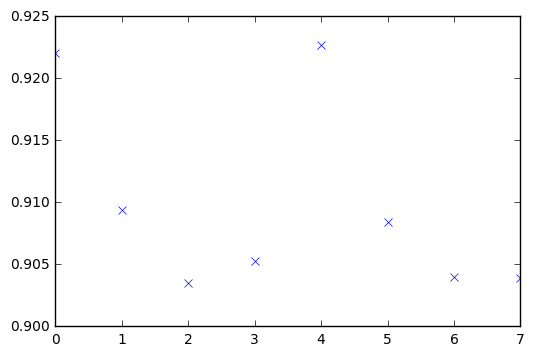

In [76]:
plot(radiomean, 'x')

In [77]:
radiomean

array([ 0.92201919,  0.90938182,  0.90347677,  0.9052404 ,  0.92268687,
        0.90839293,  0.90395354,  0.90390404])

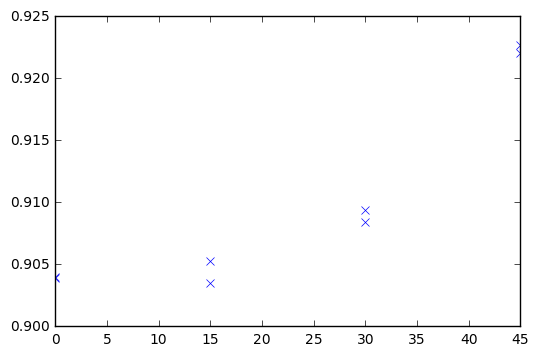

In [78]:
plot(angles, radiomean, 'x')

In [79]:
depth = 1. / np.cos(np.array(angles) * pi / 180.)

In [81]:
mask = radiomean == radiomean.min()

In [82]:
radiomean = radiomean[~mask]
depth = depth[~mask]

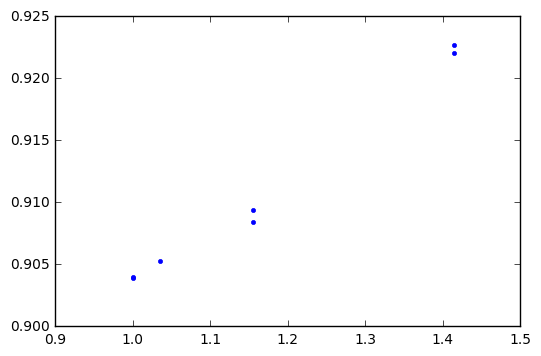

In [90]:
plot(depth, radiomean, '.')

In [84]:
from scipy.optimize import curve_fit

In [85]:
def line(x, m, b):
    return m * x + b

In [86]:
params, cov = curve_fit(line, depth, radiomean)

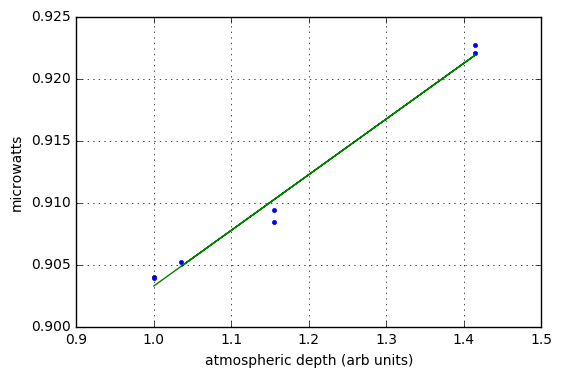

In [91]:
plot(depth, radiomean, '.')
plot(depth, line(depth, *params))
grid()
xlabel('atmospheric depth (arb units)')
ylabel('microwatts')

In [93]:
cmb_radio = params[1]

In [94]:
cmb_radio

0.85836371032426551

In [95]:
# 85 nano Watts

In [96]:
boxfiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-03_1*box*.txt')

In [97]:
boxfiles

['../../radiometer/ReadoutApp/Data/2017-11-03_14:12:27box00.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:16:26box01.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_14:40:41box_return00.txt']

In [119]:
xb = {}
for dfile in boxfiles:
    xb[dfile.split('sky_')[-1]] = np.loadtxt(dfile)

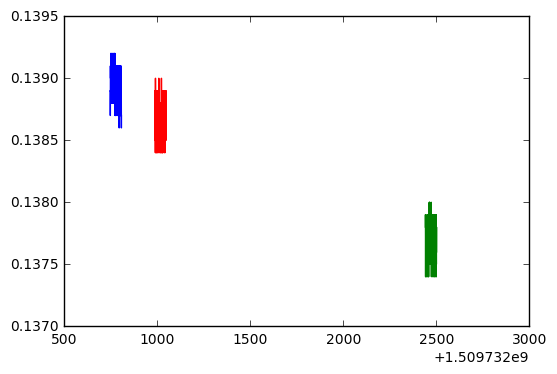

In [120]:
for key in xb.keys():
    plot(xb[key][:, 0], xb[key][:, 1])
    #plot(xn[key][:, 0]-xn[key][:, 0][0], xn[key][:, 1])

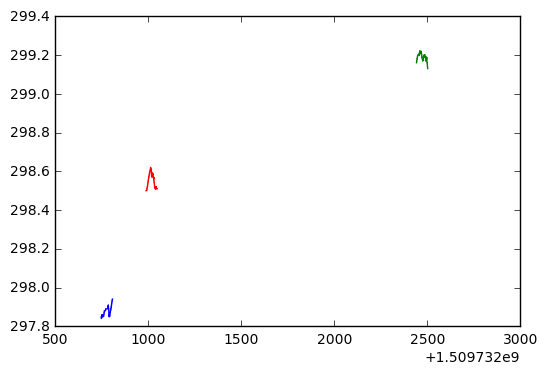

In [121]:
for key in xb.keys():
    plot(xb[key][:, 0], xb[key][:, 2])
    #plot(xn[key][:, 0]-xn[key][:, 0][0], xn[key][:, 1])

In [122]:
boxradios = []
for key in xb.keys():
    boxradios = np.concatenate([boxradios, xb[key][:, 1]])

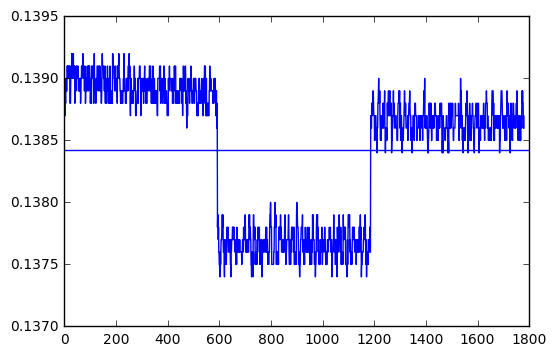

In [127]:
plot(boxradios)
axhline(boxradiomean)

In [131]:
boxradiomean = np.mean(boxradios) * 10. 

In [132]:
boxradiomean

1.3842000000000001

In [128]:
nitroradio = []
for key in xn.keys():
    nitroradio = np.concatenate([nitroradio, xn[key][:, 1]])

In [129]:
nitroradiomean = np.mean(nitroradio)

In [130]:
nitroradiomean

0.99865267003934799

In [133]:
nitrotemp = 77.45
boxtemp = 298.6

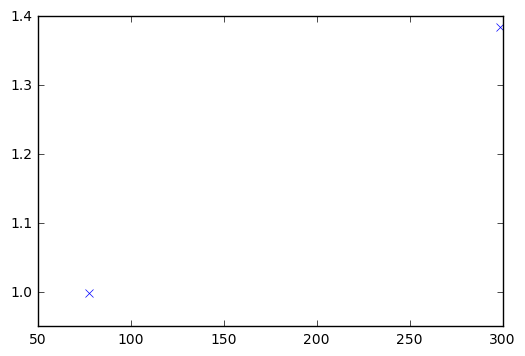

In [135]:
plot([boxtemp, nitrotemp], [boxradiomean, nitroradiomean], 'x')

In [136]:
slope = (boxtemp - nitrotemp) / (boxradiomean - nitroradiomean)

In [137]:
b = boxtemp - slope * boxradiomean

In [141]:
rmeans = np.array([nitroradiomean, boxradiomean])

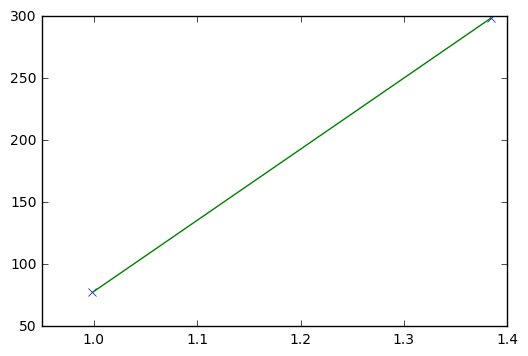

In [142]:
plot([nitroradiomean, boxradiomean], [nitrotemp, boxtemp], 'x')
plot(rmeans, slope * rmeans + b)

In [143]:
cmb_temp = slope * cmb_radio + b

In [145]:
cmb_temp

-3.0197660444355847

In [114]:
nitrofiles = glob.glob('../../radiometer/ReadoutApp/Data/2017-11-03_1*nitro*.txt')

In [115]:
nitrofiles

['../../radiometer/ReadoutApp/Data/2017-11-03_14:44:00nitrogen_00.txt',
 '../../radiometer/ReadoutApp/Data/2017-11-03_15:09:22nitrogen_ii.txt']

In [116]:
xn = {}
for dfile in nitrofiles:
    xn[dfile.split('sky_')[-1]] = np.loadtxt(dfile)

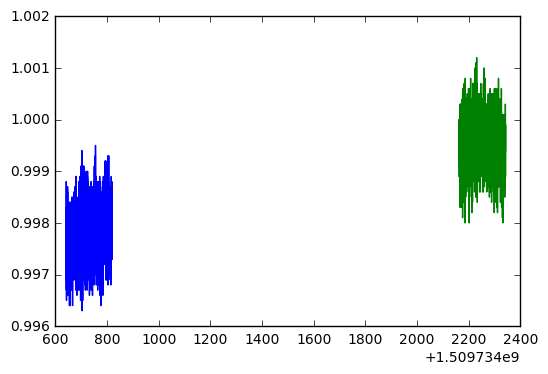

In [117]:
for key in xn.keys():
    plot(xn[key][:, 0], xn[key][:, 1])
    #plot(xn[key][:, 0]-xn[key][:, 0][0], xn[key][:, 1])

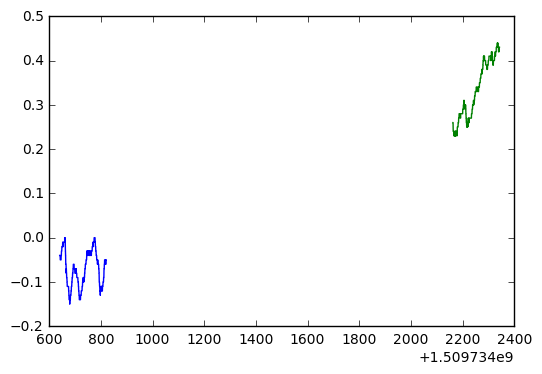

In [118]:
for key in xn.keys():
    plot(xn[key][:, 0], xn[key][:, 2]-299.)
    #plot(xn[key][:, 0]-xn[key][:, 0][0], xn[key][:, 1])

In [ ]:
`